<a href="https://colab.research.google.com/github/TPRibeiro/mvp_mla/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A obesidade em dados.

# Introdução

Organização Mundial da Saúde (OMS) define obesidade como o acúmulo excessivo de gordura corporal que pode prejudicar a saúde (WHO, 2024), e é considerada uma doença crônica que afeta pessoas de todas as idades e grupos sociais. A obesidade também pode levar à outras doenças, como diabetes tipo 2, doenças cardiovasculares, hipertensão, acidente vascular cerebral e vários tipos de câncer.

Indivíduos em risco são orientados por profissionais de saúde a comer menos calorias e se exercitar mais, frequentemente usando limites de índice de massa corporal (IMC) para triagem e para orientar o progresso e o prognóstico.

A OMS considera uma pessoa obesa quando seu Índice de Massa Corporal (IMC) é igual ou superior a 30 kg/m². O IMC é calculado dividindo o peso da pessoa pela altura ao quadrado.

De acordo com a Organização Pan-americana de Saúde (PAHO), uma em cada oito pessoas, no mundo, vive com obesidade (2024), o que demonstra a importância da prevenção e do controle da obesidade desde o início da vida até a idade adulta.

A obesidade é uma doença crônica complexa, mas as causas são bem compreendidas, assim como as intervenções necessárias para conter a crise, que são respaldadas por fortes evidências. No entanto, elas não são implementadas (PAHO, 2024).

Neste trabalho, estaremos estipulando o nível de obesidade para um indivíduo em um problema de classificação multiclasse.

O objetivo seria não apenas implementar as técnicas aprendidas na _sprint_
 "Machine Learning & Analytics", mas também facilitar a predição dos níveis de obesidade e estimular a implementação de políticas que possam combatê-la.

O nível de obesidade será definido como o valor _target_, e poderá ser equivalente a: peso normal, sobrepeso nível I, sobrepeso nível II, obesidade tipo I, obesidade tipo II ou obesidade tipo III.

A fonte dos dados utilizados é o trabalho intitulado "Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico." (PALECHOR & MANOTAS, 2019). Os dados foram obtidos em um arquivo .csv e contêm 17 atributos (colunas) e 2.111 registros (linhas). De acordo com os autores, 77% dos dados foram gerados sinteticamente usando a ferramenta Weka e o filtro SMOTE, e 23% dos dados foram coletados diretamente dos usuários por meio de uma plataforma web.

Adicionalmente, os valores atribuídos aos níveis de obesidade (NObesity) se basearam no Índice de Massa Corporal (IMC) do usuário e na respectiva classificação utilizada pela OMS, que se dá da seguinte forma:

* IMC < 18,5 kg/m² - baixo peso
* IMC > 18,5 até 24,9 kg/m² - peso adequado
* IMC ≥ 25 até 29,9 kg/m² - sobrepeso
* IMC > 30,0 kg/m² até 34,9 kg/m² - obesidade grau 1
* IMC > 35 kg/m² até 39,9 kg/m² - obesidade grau 2
* IMC > 40 kg/m² - obesidade extrema

O dataset foi importado do Kaggle a partir de: https://www.kaggle.com/datasets/abdelrahman16/obesity-dataset; alguns valores foram legendados incorretamente no Kaggle, mas corrigidos aqui baseando-se no trabalho original.

In [9]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#Imports necessários
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
path = kagglehub.dataset_download("abdelrahman16/obesity-dataset") # Download e local da versão mais recente do dataset de níveis de obesidade (https://www.kaggle.com/datasets/abdelrahman16/obesity-dataset?select=ObesityDataSet_raw_and_data_sinthetic.csv)
print("Local dos arquivos do dataset:", path)
csv_file = os.path.join(path, "ObesityDataSet_raw_and_data_sinthetic.csv") # para encontrar o arquivo CSV dentro do diretório acima
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.preprocessing import LabelEncoder # para transformar valores não-numéricos em numéricos
from sklearn.impute import SimpleImputer # para tratar dados faltantes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
print("Importação concluída com sucesso.")






Local dos arquivos do dataset: /root/.cache/kagglehub/datasets/abdelrahman16/obesity-dataset/versions/1
Importação concluída com sucesso.


Abaixo, se encontram as 17 colunas no arquivo importado do Kaggle, com suas respectivas descrições:

**Visão geral do dataset:**


*   🧑‍🦱 Age: Idade do indivíduo.
*   🚻 Gender: Gênero do indivíduo.
*   📏 Height: Altura do indivíduo.
*   ⚖️ Weight: Peso do indivíduo.
*   🍾 CALC: Frequência do consumo de álcool.
*   🍟 FAVC: Consumo frequente de comidas de alta caloria.
*   🥗 FCVC: Frequência de consumo de vegetais.
*   🍽️ NCP: Número de refeições principais.
*   📓 SCC: Monitorização do consumo de calorias.
*   🚬 SMOKE: Fumante.
*   💧 CH2O: Consumo diário de água.
*   🏠 Family history of overweight: Histórico familiar de sobrepeso.
*   🏃 FAF: Frequência de atividade física.
*   ⌛ TUE: Tempo utilizando dispositivos tecnológicos.
*   🍕 CAEC: Consumo de comida entre refeições.
*   🚗 MTRANS: Método de transporte.
*   ⚖️ NObeyesdad: Nível de obesidade.




# Preparação dos dados

In [10]:
obesidade = pd.read_csv(csv_file) # Leitura do arquivo CSV anteriormente importado
dataset = obesidade.copy() # Determinação do dataset (cópia para eventuais erros)
dataset = dataset.rename(columns={'NObeyesdad': 'target'}) # Renomear a coluna 'NObeyesdad', ou níveis de obesidade, para 'target'
print("Dataset carregado com sucesso!", "\n\nPrimeiras linhas do dataset:")
dataset.head() # Mostra as primeiras linhas do dataset


Dataset carregado com sucesso! 

Primeiras linhas do dataset:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,target
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Como pode ser observado na amostra do dataset na tabela gerada acima, este possui alguns valores não-numéricos (aqui nomeados valores NaN, do inglês _not a number_).

Assim, estes valores precisarão ser transformados em valores numéricos, para que os modelos de machine learning possam ler os dados com sucesso. Esta transformação será realizada na etapa "preparação de dados 1" abaixo.

A título de controle, a quantificação de dados NaN e da transformação dos dados NaN para numéricos será apresentada no fim do código. É esperado que haja 0 dados NaN no total.


---


O mapeamento dos valores binários se dará conforme o descrito abaixo:

Gender (gênero):
* Female: 0;
* Male: 1

FAVC (Consumo frequente de comidas de alta caloria);
SCC (Monitorização do consumo calórico);
SMOKE (Fumante);
Family_history_with_overweight (Histórico familiar de sobrepeso):
* No: 0;
* Yes: 1

---

O mapeamento de valores não-binários se dará de acordo com a legenda abaixo:

CAEC (Consumo de comida entre refeições);
CALC (Consumo de álcool):

* No: 0,
* Sometimes: 1,
* Frequently: 2,
* Always: 3

MTRANS (método de transporte):

* Public Transportation: 0,
* Walking: 1,
* Automobile: 2,
* Motorbike: 3,
* Bike: 4

target (Níveis de obesidade):

* Normal weight: 0,
* Overweight level I: 1,
* Overweight level II: 2,
* Obesity type I: 3,
* Obesity type II: 4,
* Obesity type III: 5,
* Insufficient Weight': 6



In [11]:
# Preparação dos dados 1


# Convertendo as colunas: 'Gender', 'favc', 'scc', 'smoke', 'family_history_with_overweight', para valores numéricos usando LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['FAVC'] = le.fit_transform(dataset['FAVC'])
dataset['SCC'] = le.fit_transform(dataset['SCC'])
dataset['SMOKE'] = le.fit_transform(dataset['SMOKE'])
dataset['family_history_with_overweight'] = le.fit_transform(dataset['family_history_with_overweight'])

# Convertendo para valores numéricos as colunas 'CAEC', 'MTRANS', 'target' e 'calc' com mapeamento ordinal
# E aplicando os mapeamentos às respectivas colunas.

#CAEC
CAEC_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
dataset['CAEC'] = dataset['CAEC'].map(CAEC_mapping)

#MTRANS
MTRANS_mapping = {
    'Public_Transportation': 0,
    'Walking': 1,
    'Automobile': 2,
    'Motorbike': 3,
    'Bike': 4
}
dataset['MTRANS'] = dataset['MTRANS'].map(MTRANS_mapping)

#target
# Limpar espaços extras e padronizar para minúsculas para evitar valores NaN
dataset['target_original'] = dataset['target']  # Salvar original para conferência (no caso de erros)
dataset['target'] = dataset['target'].str.strip().str.lower()

# Atualizar o mapeamento com os valores limpos
target_mapping = {
    'normal_weight': 0,
    'overweight_level_i': 1,
    'overweight_level_ii': 2,
    'obesity_type_i': 3,
    'obesity_type_ii': 4,
    'obesity_type_iii': 5,
    'insufficient_weight': 6
}
dataset['target'] = dataset['target'].map(target_mapping)

#CALC
CALC_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
dataset['CALC'] = dataset['CALC'].map(CALC_mapping)

print('Verificação dos dados:\n')
# Verificação dos valores NaN: confirmando que todos os dados foram mapeados para numéricos com sucesso.
nan_counts = dataset.isna().sum()
print("Quantidade de valores NaN (not a number) em cada coluna:\n", nan_counts)

#Confirmação dos valores únicos disponíveis para cada coluna: confirmando de que o mapeamento foi correto de valores não-binários para numéricos.
print("\nConfirmação dos valores únicos disponíveis em cada coluna (cujos valores não-binários foram mapeados):")
print("Valores únicos em CAEC:", dataset['CAEC'].unique())
print("Valores únicos em MTRANS:", dataset['MTRANS'].unique())
print("Valores únicos em target:", dataset['target'].unique())
print("Valores únicos em CALC:", dataset['CALC'].unique())



Verificação dos dados:

Quantidade de valores NaN (not a number) em cada coluna:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
target                            0
target_original                   0
dtype: int64

Confirmação dos valores únicos disponíveis em cada coluna (cujos valores não-binários foram mapeados):
Valores únicos em CAEC: [1 2 3 0]
Valores únicos em MTRANS: [0 1 2 3 4]
Valores únicos em target: [0 1 2 3 6 4 5]
Valores únicos em CALC: [0 1 2 3]


O próximo passo, a "preparação dos dados 2", será preparar os dados para o treinamento e avaliação do modelo de aprendizado de máquina. Este envolverá dividir os dados, lidar com valores ausentes (devido ao aparecimento de um erro) e configurar a validação cruzada.

In [12]:
#Preparação dos dados 2

test_size = 0.20 # tamanho do conjunto de teste
seed = 13 # semente aleatória

# Separação em bases de treino e teste
array = dataset.values
X = array[:,0:16] # atributos
y = array[:,16] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Preenchendo valores faltantes com a moda e convertendo para int. Este passo foi necessário devido a aparição de um erro ao se utilizar o modelo KNN na etapa de modelagem, que não estava conseguindo ler certos valores corretamente em "y".
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # Usando a moda para dados categóricos
# Aplicando imputer para y_train e y_test separadamente
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = imputer.transform(y_test.reshape(-1, 1)).ravel()

# Explicitamente convertendo para tipo inteiro do Numpy, garantindo que as categorias dos níveis de obesidade estão sendo representadas em números inteiros.
y_train = y_train.astype(np.int64) # or np.int32
y_test = y_test.astype(np.int64) # or np.int32

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Modelagem e treinamento

Agora que os dados foram preparados, diferentes modelos de machine learning serão testados individualmente para que seja verificado qual deles apresenta o melhor desempenho na previsão dos níveis de obesidade. No fim, um gráfico boxplot será gerado, permitindo uma comparação visual do desempenho de cada modelo.

A avaliação foi realizada com validação cruzada, que garante uma avaliação mais robusta e imparcial dos modelos, e assim, permitirá a seleção do modelo com melhor capacidade de generalização para dados novos e desconhecidos.



KNN: 0.858988 (0.029409)
CART: 0.936584 (0.027110)
NB: 0.613166 (0.028198)
SVM: 0.543794 (0.040832)


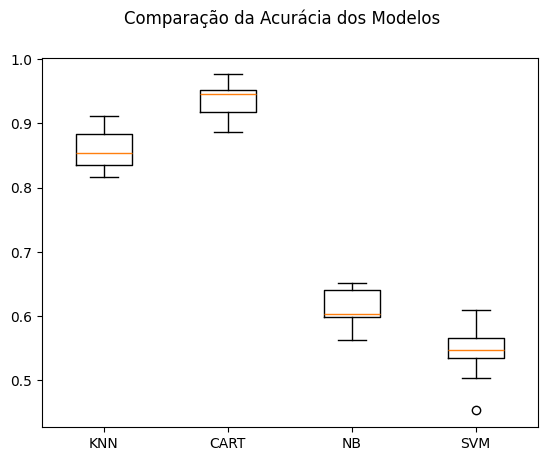

In [13]:
# Modelagem sem ensemble

# Definindo uma seed global para esta célula de código
np.random.seed(13)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Tendo em vista os resultados acima, a árvore de decisão,  seria o modelo recomendado. Isso se deve, pois o CART (um algoritmo para a elaboração de uma Árvore de Decisão) apresentou os melhores resultados: cerca de 94% de acurácia média e desvio-padrão de aproximadamente 3%.

Verificaremos agora se este resultado pode ser melhorado com o uso de _ensemble_.

Os métodos _ensemble_ combinam vários modelos de machine learning, que podem ser de diferentes algoritmos ou variações do mesmo, para criar um modelo final.

LR: 0.700271 (0.021901)
KNN: 0.858988 (0.029409)
CART: 0.936584 (0.027110)
NB: 0.613166 (0.028198)
SVM: 0.543794 (0.040832)
Bagging: 0.954378 (0.019649)
RF: 0.943709 (0.016432)
ET: 0.937176 (0.016920)
Ada: 0.308052 (0.048258)
GB: 0.959725 (0.015372)
Voting: 0.850099 (0.024256)


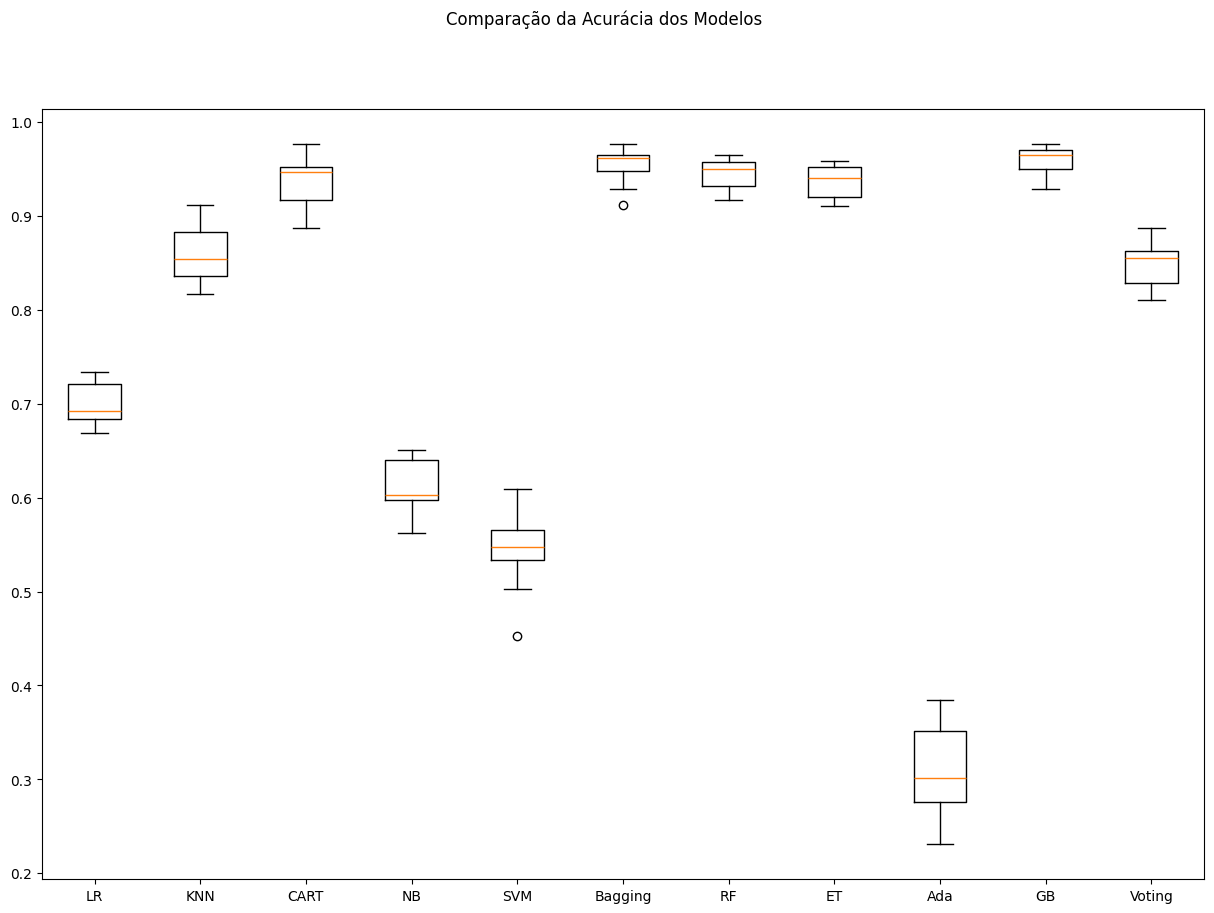

In [14]:
# Modelagem

np.random.seed(13) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

De acordo com o resultado acima, podemos determinar que o uso do método ensemble boosting, mais precisamente com o algoritmo Gradient Boosting (GB), foi o que obteve melhor resultado: cerca de 96% de acurácia média com um desvio-padrão de aproximadamente 1,5%.

O resultado do ensemble é melhor que o do método base, que encontrou cerca de 94% de acurácia média e desvio-padrão de cerca de 3%

Agora, vamos repetir esse processo, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados, e comparar o seu resultado com os modelos treinados com o dataset original.

O StandardScaler será usado para padronização dos dados. Ele transforma os dados subtraindo a média e dividindo pelo desvio padrão, resultando em uma distribuição com média zero e variância unitária.

O MinMaxScaler será usado para normalização dos dados. Ele escala os dados para um intervalo específico, geralmente entre 0 e 1, subtraindo o valor mínimo e dividindo pelo intervalo (máximo - mínimo).

Ao usar pipelines em conjunto com a validação cruzada, é possível garantir que o pré-processamento de dados (padronização/normalização) será aplicado corretamente, evitando o data leakage e permitindo uma avaliação mais realista do desempenho do modelo. Isso contribui para a construção de modelos mais robustos e generalizáveis.



Modelo: acurácia (desvio-padrão)
LR-orig: 0.700 (0.022)
KNN-orig: 0.859 (0.029)
CART-orig: 0.937 (0.027)
NB-orig: 0.613 (0.028)
SVM-orig: 0.544 (0.041)
Bag-orig: 0.954 (0.020)
RF-orig: 0.944 (0.016)
ET-orig: 0.937 (0.017)
Ada-orig: 0.308 (0.048)
GB-orig: 0.960 (0.015)
Vot-orig: 0.850 (0.024)
LR-padr: 0.870 (0.021)
KNN-padr: 0.804 (0.026)
CART-padr: 0.926 (0.023)
NB-padr: 0.607 (0.034)
SVM-padr: 0.881 (0.026)
Bag-padr: 0.954 (0.018)
RF-padr: 0.949 (0.021)
ET-padr: 0.937 (0.015)
Ada-padr: 0.308 (0.048)
GB-padr: 0.961 (0.017)
Vot-padr: 0.923 (0.018)
LR-norm: 0.718 (0.025)
KNN-norm: 0.763 (0.031)
CART-norm: 0.926 (0.029)
NB-norm: 0.609 (0.031)
SVM-norm: 0.804 (0.014)
Bag-norm: 0.955 (0.017)
RF-norm: 0.946 (0.019)
ET-norm: 0.934 (0.021)
Ada-norm: 0.308 (0.048)
GB-norm: 0.961 (0.018)
Vot-norm: 0.836 (0.021)


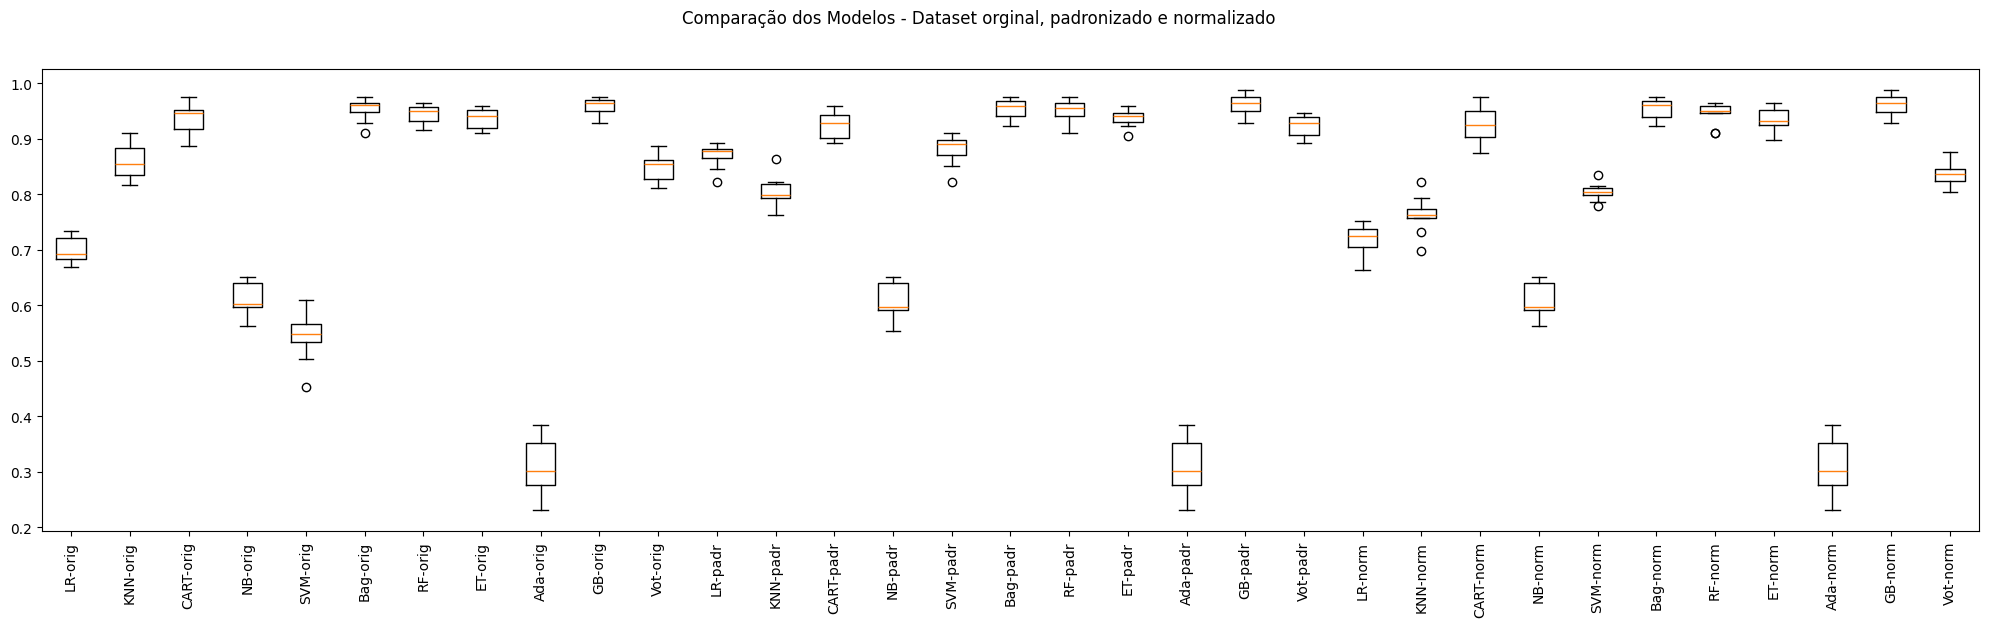

In [15]:
#Padronização e normalização dos dados

np.random.seed(13) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler()) #padronização
min_max_scaler = ('MinMaxScaler', MinMaxScaler()) #normalização


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

print('Modelo: acurácia (desvio-padrão)')
# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Ao avaliar os modelos, pôde-se determinar que o Gradient Boosting (GB) permaneceu com o melhor resultado. A padronização e normalização dos dados gerou um ligeiro aumento na acurácia dos testes, apesar de uma pequena diminuição do desvio-padrão.

Embora o menor desvio padrão do GB-orig (original) seja atraente, a acurácia ligeiramente maior do GB-padr (padronizado) ou GB-norm (normalizado) os tornam as melhores escolhas.

Ainda assim, o desvio padrão do GB-padr foi de 0,017, enquanto o de GB-norm foi de 0,018.

Considerando esses fatores, GB-padr demonstrou o melhor equilíbrio entre acurácia e estabilidade, tornando-o uma escolha mais robusta para a maioria dos cenários.

A seguir, tentaremos novamente melhorar esse resultado, agora especificamente o do GB-padr, ao executar a otimização dos hiperparâmetros do algoritmo Gradient Boosting. A técnica utilizada foi a RandomizedSearchCV da biblioteca scikit-learn.

A Randomized Search amostra aleatoriamente um número predefinido de combinações de hiperparâmetros a partir de um espaço de parâmetros especificado. A escolha da Randomized Search (e seus valores) se deu com o intuito de deixar o código mais rápido e leve, pois ao se tentar utilizar o Grid Search, o requerimento computacional e o tempo necessário para rodar o código foram significativamente maiores e não justificáveis para este trabalho.





In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Integrar o Pré-processamento no Pipeline
# Pipeline para GB-padr
pipeline_padr = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

# Grade de hiperparâmetros para GB-padr com ajuste do StandardScaler
param_dist_padr = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'gb__n_estimators': [50, 100, 200],  # Número de árvores
    'gb__learning_rate': [0.01, 0.1, 0.2],  # Taxas de aprendizado
    'gb__max_depth': [3, 5, 7],  # Profundidade máxima
    'gb__subsample': [0.8, 1.0],  # Subamostragem para reduzir overfitting
    'gb__min_samples_split': [2, 5],  # Mínimo de amostras para dividir um nó
    'gb__min_samples_leaf': [1, 2]  # Mínimo de amostras em um nó folha
}

# RandomizedSearchCV para explorar o espaço de busca de forma mais eficiente
random_search_padr = RandomizedSearchCV(
    estimator=pipeline_padr,
    param_distributions=param_dist_padr,
    n_iter=15,  # Número de iterações
    cv=5,  # Número de folds na validação cruzada
    scoring='accuracy',
    random_state=13,  # Para reprodutibilidade
    n_jobs=-1  # Utiliza todos os núcleos do processador para paralelizar
)

# Treinamento do modelo
random_search_padr.fit(X_train, y_train)

# Imprimir a acurácia média do treino
cv_results = random_search_padr.cv_results_

# Melhores hiperparâmetros e acurácia
print("Melhores hiperparâmetros (GB-padr):", random_search_padr.best_params_)

# Acessando os resultados da validação cruzada
cv_results = random_search_padr.cv_results_
mean_accuracy = cv_results['mean_test_score'][random_search_padr.best_index_]
std_accuracy = cv_results['std_test_score'][random_search_padr.best_index_]

# Imprimindo a acurácia com o desvio-padrão (estimativa do desempenho esperado do modelo com os hiperparâmetros selecionados em dados não vistos)
print(f"Acurácia média do treino (GB-padr): {mean_accuracy:.3f} (±{std_accuracy:.3f})")


Melhores hiperparâmetros (GB-padr): {'scaler__with_std': False, 'scaler__with_mean': True, 'gb__subsample': 0.8, 'gb__n_estimators': 200, 'gb__min_samples_split': 5, 'gb__min_samples_leaf': 2, 'gb__max_depth': 7, 'gb__learning_rate': 0.1}
Acurácia média do treino (GB-padr): 0.967 (±0.013)


In [17]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do Scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino

# Extraindo apenas os parâmetros de GB de best_params_
gb_params = {key[3:]: value for key, value in random_search_padr.best_params_.items() if key.startswith('gb__')}
# Removendo underlines ("_") das chaves (keys).
gb_params = {k.lstrip('_'): v for k, v in gb_params.items()}

model = GradientBoostingClassifier(**gb_params) # Usando apenas os parâmetros GB
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print('Acurácia média do teste:', accuracy_score(y_test, predictions))

Acurácia média do teste: 0.9763593380614657


O modelo obteve aproximadamente 97% de acurácia no treino (utilizando-se a validação cruzada) e aproximadamente 97,6% de acurácia no teste no momento em que este trabalho foi escrito (tendo em vista a natureza aleatória do Randomized Search, é possível que os valores variem ligeiramente cada vez que o código for rodado).

As acurácias no treino e no teste foram altas e próximas, determinando um bom ajuste do modelo - ou seja, o modelo performa bem tanto com os dados de treino quanto os dados de teste, indicando que ele aprendeu a generalizar para dados novos sem estar muito ajustado aos dados de treino (ausência de underfitting ou overfitting).

O código a seguir preparará todo o conjunto de dados, padronizando os atributos e garantindo que a variável target estará no formato correto. Em seguida, ele treinará o modelo final de machine learning nesses dados preparados, permitindo que ele faça previsões sobre novos dados.

In [18]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
y = y.astype(np.int64) # Convertendo y para tipo inteiro do Numpy, garantindo que as categorias dos níveis de obesidade estão sendo representadas em números inteiros.

model.fit(rescaledX, y)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                           n_estimators=200, subsample=0.8)

# Resultados & Conclusão

Agora que o modelo foi finalizado, poderemos testá-lo ao alimentar novos dados. Esses dados serão fornecidos pelo usuário e gerarão o resultado (o valor target), quando todos forem fornecidos corretamente.

Como os dados originais se encontram em inglês, o código inclui a tradução dos valores que serão fornecidos pelo usuário alvo em português para o ingles. Legendas foram incluidas para todos os passos e espera-se que o resultado seja fornecido sem erros desde que as informações sejam inseridas corretamente.

In [19]:
# Novos dados - os dados serão um input do usuário
data = {}
keys = ['Gender','Age','Height','Weight','FAF','NCP','CH2O','TUE','FCVC','FAVC','SCC','SMOKE','family_history_with_overweight','MTRANS','CAEC', 'CALC',]
numerical_attributes_printed = False
yes_no_values_printed = False
frequency_printed = False

# Adquirir o valor dos dados a partir do usuário para cada key definida acima.
for key in keys:
    if key == 'Gender':
        while True:
            value = input(f"Vamos começar com nossas perguntas! \nEste teste tem o potencial de predizer o seu nível de obesidade. Por favor, leia todas as questões cuidadosamente.\n\nDigite o valor para {key}. Qual é o seu gênero? (F/M): ").strip().lower()
            if value in ['m', 'f']:
                data[key] = 1 if value == 'm' else 0  # Mapeia para valores numéricos
                break
            else:
                print("Valor inválido. Por favor, insira 'M' para masculino ou 'F' para feminino.")

    elif key in ['CAEC', 'CALC']:
        if not frequency_printed:  #Checa se já ocorreu a impressão ("print") da legenda, para evitar a repetição da legenda a cada instância.
            print("\nA seguir, as perguntas irão lhe pedir a frequência de CAEC e CALC. Considere:\n\nCAEC: Consumo de comida entre refeições. Com que frequência você come entre as refeições principais?\nCALC: Consumo de álcool. Com que frequência você consome bebidas alcólicas?\n")
            frequency_printed = True  # Determina o valor para True, impedindo aqui a repetição da legenda.
        while True:
            value = input(f"Digite o valor para {key} (nunca/às vezes/frequentemente/sempre):").strip().lower()

            # Tradução do input em português (idioma do usuário alvo) para o inglês (a língua que os dados estão)
            if value == "nunca":
                translated_value = "no"
            elif value == "às vezes":
                translated_value = "sometimes"
            elif value == "frequentemente":
                translated_value = "frequently"
            elif value == "sempre":
                translated_value = "always"
            else:
                translated_value = None  # Para inputs inválidos

            if translated_value in ['no', 'sometimes', 'frequently', 'always']:
                # Aplica os mapeamentos
                if key == 'CAEC':
                    data[key] = CAEC_mapping.get(translated_value)
                elif key == 'CALC':
                    data[key] = CALC_mapping.get(translated_value)
                break
            else:
                print("Valor inválido. Por favor, digite 'nunca', 'às vezes', 'frequentemente' ou 'sempre'.")
    elif key == 'MTRANS':
       while True:
           value = input(f"\nDigite o valor para {key}. Qual o método de transporte que costuma utilizar com mais frequência? \nEscolha entre: transporte público / caminhada / carro / moto / bicicleta:\n").strip().lower()
           # Tradução do PT para EN
           if value in ["transporte público", "caminhada", "carro", "moto", "bicicleta"]:
               if value == "transporte público":
                   translated_value = "public_transportation"
               elif value == "caminhada":
                   translated_value = "walking"
               elif value == "carro":
                    translated_value = "automobile"
               elif value == "moto":
                   translated_value = "motorbike"
               elif value == "bicicleta":
                   translated_value = "bike"

               data[key] = MTRANS_mapping.get(translated_value)  # Aplica o mapeamento do MTRANS
               break # Movido para dentro do if
           else:
               print("Valor inválido. Por favor, digite 'transporte público', 'caminhada', 'carro', 'moto', ou 'bicicleta'.")

    elif key in ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']:  # Lida com as questões sim/não
        if not yes_no_values_printed:  # Verifica se a legenda já foi "printed"
           print('\nOs próximos valores requisitados são perguntas onde deverá responder "sim" ou "nao" ("não" sem acento). Considere:\n\nFAVC: Consumo frequente de comidas altamente calóricas. Você consome comidas de alta caloria frequentemente? (ex.:fast food)\nSCC: Monitorização calórica. Você monitora quantas calorias ingere diariamente?\nSMOKE: Fumante. Você fuma?\nfamily_history_with_overweight: Histórico familiar de sobrepeso. Alguém na sua família tem sobrepeso?\n')
           yes_no_values_printed = True
        while True:
            value = input(f"Insira o valor para {key} (sim/nao): ").strip().lower()
            if value in ['sim', 'nao']:
                data[key] = 1 if value == 'sim' else 0  # Mapeia para valores numéricos
                break
            else:
                print("Valor inválido. Por favor, digite 'sim' ou 'nao' (sem acento).")

    else:  # Handle numerical attributes
        if not numerical_attributes_printed:  # Verifica se a legenda já foi "printed"
           print('\nA seguir, valores numéricos serão requisitados. Considere:\n\nAge: Idade. Qual sua idade?\nHeight: Altura. Qual sua altura? (em metro). \nAtenção: Use ponto ao invés de vírgula! Ex: ao invés de 1,70, digite 1.70\nWeight: Peso. Qual seu peso? (em kilogramas)\nFAF: Frequência de atividade física. Quantos dias por semana você pratica alguma atividade física?\nNCP:Frequência de refeições. Quantas refeições principais você faz por dia?\nCH2O: Consumo de água. Quantos litros de água você bebe por dia?\nTUE: Tempo utilizando dispositivos tecnológicos. Entre os valores 0 e 3, quanto tempo por dia passa nesses dispositivos?\n    Digite de acordo: 0 - para 0 à 2 horas de uso; 1 - para 3 à 5 horas; 3 - para 6 horas ou mais.\nFCVC: Consumo de vegetais. Entre os valores 1 e 3, com que frequência consome vegetais com suas refeições?\n    Digite: 1 - nunca; 2 - às vezes; 3 - sempre\n',)
           numerical_attributes_printed = True
        while True:
            try:
                value = float(input(f"Insira um valor para {key}: "))
                data[key] = value
                break
            except ValueError:
                print("Valor inválido. Por favor, insira um valor numérico. Caso tenha recebido o erro em 'Height', certifique-se de que usou '.' ao invés de ','")

entrada = pd.DataFrame([data], columns=keys)
print('\n\nCalculando...\n\n')
# Aplicando StandardScaler e imputando dentro de um Pipeline. Isso garante que as mesmas etapas de pré-processamento usadas durante o treinamento serão aplicadas aos novos dados
from sklearn.pipeline import Pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Imputa após o escalonamento
])

# Ajusta o pré-processador aos dados de treinamento originais
preprocessor.fit(X_train)

# Transforma os novos dados de entrada usando o pré-processador ajustado
X_entrada_processed = preprocessor.transform(entrada)

# Continua com a predição
prediction = model.predict(X_entrada_processed)[0]

# Mapeamento reverso para a variável 'target'
target_mapping_reverse = {v: k for k, v in target_mapping.items()}
predicted_target = target_mapping_reverse.get(prediction)

# Dicionário para tradução
traducao_target = {
    'normal_weight': 'Peso normal',
    'overweight_level_i': 'Sobrepeso nível I',
    'overweight_level_ii': 'Sobrepeso nível II',
    'obesity_type_i': 'Obesidade tipo I',
    'obesity_type_ii': 'Obesidade tipo II',
    'obesity_type_iii': 'Obesidade tipo III',
    'insufficient_weight': 'Peso insuficiente'
}

# Tradução do resultado
predicted_target_pt = traducao_target.get(predicted_target, predicted_target)

print(f"Nível de obesidade previsto: {predicted_target_pt}")

Vamos começar com nossas perguntas! 
Este teste tem o potencial de predizer o seu nível de obesidade. Por favor, leia todas as questões cuidadosamente.

Digite o valor para Gender. Qual é o seu gênero? (F/M): 33
Valor inválido. Por favor, insira 'M' para masculino ou 'F' para feminino.
Vamos começar com nossas perguntas! 
Este teste tem o potencial de predizer o seu nível de obesidade. Por favor, leia todas as questões cuidadosamente.

Digite o valor para Gender. Qual é o seu gênero? (F/M): f

A seguir, valores numéricos serão requisitados. Considere:

Age: Idade. Qual sua idade?
Height: Altura. Qual sua altura? (em metro). 
Atenção: Use ponto ao invés de vírgula! Ex: ao invés de 1,70, digite 1.70
Weight: Peso. Qual seu peso? (em kilogramas)
FAF: Frequência de atividade física. Quantos dias por semana você pratica alguma atividade física?
NCP:Frequência de refeições. Quantas refeições principais você faz por dia?
CH2O: Consumo de água. Quantos litros de água você bebe por dia?
TUE: Tem

Neste trabalho enfrentamos um problema de classificação multiclasse e na resolução deste, foi determinado que o ensemble boosting, com o algoritmo Gradient Boosting padronizado, apresentou a melhor acurácia. O modelo posteriormente gerado também apresentou um bom ajuste e performou conforme o esperado, gerando um resultado de acordo.

O IMC pode ser impreciso em sua medição da obesidade, pois possui diversas limitações. Pode-se dizer que o IMC estima a adiposidade de forma grosseira, tendo em vista que músculos e ossos têm uma densidade maior do que a gordura (tecido adiposo), e algumas disposições de gordura são piores do que outras. O IMC não mede a saúde funcional e a aptidão física, e é meramente uma medida antropométrica (WU _et al_, 2024).

Ainda assim, o IMC tem uma grande vantagem, que é a facilidade de obtenção de um resultado. O índice não envolve radiação ou exames de imagem, avaliações antropométricas tecnicamente complexas ou consultas médicas ou a necessidade de submeter a procedimentos clínicos ou exames laboratoriais.

Com a quantidade cada vez maior de dados disponíveis relacionados à obesidade, podemos desenvolver modelos de inteligência artificial que também permitem um fácil uso e resultado, que podem ser utilizados em colaboração com os dados do IMC.

O modelo desenvolvido neste trabalho pode ser utilizado com este intuito. Com os valores podendo ser diretamente fornecidos pelo usuário, este se torna interativo e permite uma avaliação facilitada, pois o resultado se torna imediatamente disponível.

Assim, o uso do resultado do modelo, em conjunto com o IMC, poderia fornecer uma compreensão mais eficaz dos riscos que um paciente corre. Por exemplo, um paciente com um IMC que o colocasse em uma categoria X, mas que ao fornecer seus dados ao modelo fosse colocado em uma categoria Y de risco de obesidade mais alto, poderia ser estimulada a procurar um médico. A combinação dos resultados poderia também ser utilizada para facilitar a implementação de políticas públicas.



# Referências

* Aulas da sprint: Machine Learning & Analytics
*    Palechor, F. M., & Manotas, A. H. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in brief, 25, 104344. https://doi.org/10.1016/j.dib.2019.104344
*    Pan-American Health Organization. PAHO. (2024). Uma em cada oito
pessoas, no mundo, vive com obesidade. https://www.paho.org/pt/noticias/1-3-2024-uma-em-cada-oito-pessoas-no-mundo-vive-com-obesidade
* World Health Organization. WHO. (2024) Obesity and overweight. https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight
* Wu, Y., Li, D., & Vermund, S. H. (2024). Advantages and Limitations of the Body Mass Index (BMI) to Assess Adult Obesity. International journal of environmental research and public health, 21(6), 757. https://doi.org/10.3390/ijerph21060757
